<a href="https://colab.research.google.com/github/LTrinhKhang/AI-Week-1/blob/main/Chi_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

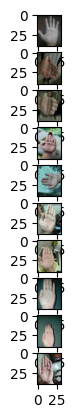

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/tay/'
for i in range(10):
  plt.subplot(10,1,i+1)
  filename=folder+'8 ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/tay/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('1'):
    output = 1
  if file.startswith('2'):
    output = 2
  if file.startswith('3'):
    output = 3
  if file.startswith('4'):
    output = 4
  if file.startswith('5'):
    output = 5
  if file.startswith('6'):
    output = 6
  if file.startswith('7'):
    output = 7
  if file.startswith('8'):
    output = 8
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('tay_photos.npy',photos)
save('tay_labels.npy',labels)

(80, 30, 40, 3) (80,)


In [ ]:
import numpy as np
x_train = np.load('/content/tay_photos.npy')
y_train = np.load('/content/tay_labels.npy')
print(x_train.shape)
print(y_train.shape)
x=x_train
y=y_train
from keras.utils import to_categorical
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,100)

(80, 30, 40, 3)
(80,)


In [ ]:
from keras.backend import flatten
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
#32 lần
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(100,activation='softmax'))
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,epochs=128,batch_size=64,verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 10, 64)         0

In [ ]:
model.save('chi tay.h5')

1/1 [==============================] - 1s 758ms/step


'Tài vận kém, sức khỏe kém, tình duyên lận đận'

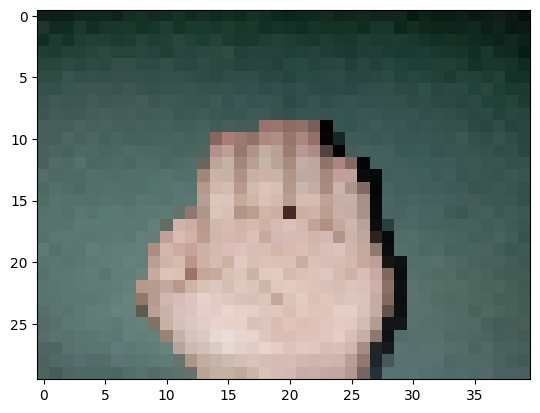

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Tài vận tốt, Sức khỏe ổn định, tình duyên đào hoa',2:'Tài vận tốt, Sức khỏe ổn định, tình duyên lận đận', 
       3:'Tài vận tốt, sức khỏe kém, Tình duyên đào hoa', 4:'Tài vận tốt, sức khỏe kém, tình duyên lận đận',
       5:'Tài vận kém, Sức khỏe ổn định, tình duyên đào hoa', 6:'Tài vận kém, Sức khỏe ổn định, tình duyên lận đận',
       7:'Tài vận kém, sức khỏe kém, Tình duyên đào hoa', 8:'Tài vận kém, sức khỏe kém, tình duyên lận đận'}
img = load_img("/content/drive/MyDrive/test/chitay test.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]